# Laboratorio 2-Graficación y análisis con Playstore

In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# inicializador de objetos gráficos
plt.style.use('ggplot')

# para elaborar gráficas
import seaborn as sns
color= sns.color_palette()

In [101]:
# Deactivar wWarnings( para el caso e librerias desactualizadas)
import warnings
warnings.filterwarnings('ignore')

In [102]:
# Filtar los datos
df= pd.read_csv('../../datos/playstore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [104]:
# eliminado datos duplicados
df.drop_duplicates(subset='App', inplace=True)

# LimpiezArithmeticErrora de Datos con  expresiones regulares lambda 

In [105]:
# **************=    Rating   = ************************

In [106]:
# Usar una función lambda para reemplazar NaN con la media de la columna 'Rating'
df['Rating'] = df['Rating'].apply(lambda x: x if pd.notna(x) else df['Rating'].mean())

In [107]:
# **************=      Reviews    = ************************

In [108]:
import re  # Importar el módulo re para trabajar con expresiones regulares

# Función para reemplazar 'M' con 'millón' y convertir a entero
def replace_and_convert(value):
    value = str(value)  # Convertir el valor a cadena de texto
    if 'M' in value:
        # Usar una expresión regular para extraer el número antes de 'M'
        number = re.sub(r'[^\d.]', '', value)  # Eliminar todo excepto dígitos y puntos
        return int(float(number) * 1_000_000)  # Convertir a entero después de multiplicar por 1,000,000
    else:
        # Convertir el valor directamente a entero
        return int(float(value))



# Aplicar la función para reemplazar y convertir los valores en la columna 'Reviews'
df['Reviews'] = df['Reviews'].apply(lambda x: replace_and_convert(x))


In [109]:
# **************=      Size    = ************************

In [110]:
# Reemplazar 'Varies with device' con np.nan
df['Size'] = df['Size'].apply(lambda x: np.nan if 'Varies with device' in str(x) else str(x))

In [111]:
# Limpiar la columna 'Size' usando una función lambda 
df['Size'] = df['Size'].apply(lambda x: x.replace('M', '').replace(',', '').replace('+', '') if isinstance(x, str) else x)

In [112]:
# Reemplazar NaN con la moda
size_mode = df['Size'].mode()[0]  # Encuentra la moda

# Reemplazar NaN con la moda utilizando lambda
df['Size'] = df['Size'].apply(lambda x: x if not pd.isna(x) else size_mode)

In [113]:
 # todo queda en MEGAS
df['Size']= df['Size'].apply(lambda x: float(str(x).replace('k',''))/1024 if 'k' in str(x) else x )

In [114]:
# Cambiar toda la columna a numerica
df['Size'] = df['Size'].apply(lambda x: float(x))

In [115]:
# **************=      Installs    = ************************

In [116]:
# Limpiar la columna Installs   usando una función lambda eliminado , y +
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '').replace(',', '') if isinstance(x, str) else x)

In [117]:
# Reemplazar 'Free' con NaN usando lambda
#df['Installs'] = df['Installs'].apply(lambda x: np.nan if x.lower() == 'free' else x)

# Reemplazar 'Free' con 0 usando lambda
df['Installs'] = df['Installs'].apply(lambda x: 0 if str(x).lower() == 'free' else x)

In [118]:
# Cambiar la columna a numerica
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [119]:
# **************=      Type    = ************************

In [120]:
# Reemplazar valores que no sean 'Free' o 'Paid' con NaN
df['Type'] = df['Type'].apply(lambda x: x if str(x).strip().lower() in ['free', 'paid'] else np.nan)

# Encontrar la moda de la columna 'Installs'
moda = df['Type'].mode()[0]

# Llenar los valores NaN con la moda usando lambda
df['Type'] = df['Type'].apply(lambda x: moda if pd.isna(x) else x)

In [121]:
# **************=      Price    = ************************

In [122]:
# columna price
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '').replace('Everyone', '0') if isinstance(x, str) else x)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [123]:
# **************=      Content Rating    = ************************

In [124]:
# llemando valores nulos  con la moda
# Reemplazar NaN con la moda
size_mode = df['Content Rating'].mode()[0]  # Encuentra la moda

# Reemplazar NaN con la moda utilizando lambda
df['Content Rating'] = df['Content Rating'].apply(lambda x: x if not pd.isna(x) else size_mode)


In [125]:
# **************=      Genres    = ************************

In [126]:
# **************=      Last Updated    = ************************

In [127]:
# Convertir la columna 'Last Updated' a formato de fecha, manejando errores
df['Last Updated'] = df['Last Updated'].apply(lambda x: pd.to_datetime(x, format='%B %d, %Y', errors='coerce'))

In [128]:
# **************=      Current Ver    = ************************

In [129]:
# Eliminar filas donde 'Current Ver' es NaN
df = df.dropna(subset=['Current Ver'])

In [130]:
# **************=      Android Ver    = ************************

In [131]:
# Eliminar filas donde 'Android Ver' es NaN
df = df.dropna(subset=['Android Ver'])

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   float64       
 5   Installs        9649 non-null   float64       
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.0+ MB


In [133]:
# Contar valores NaN por columna
#nan_counts = df.isnull().sum()
nan_counts = df.isna().sum()
nan_counts

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Graficación y análisis

In [134]:
# probando 

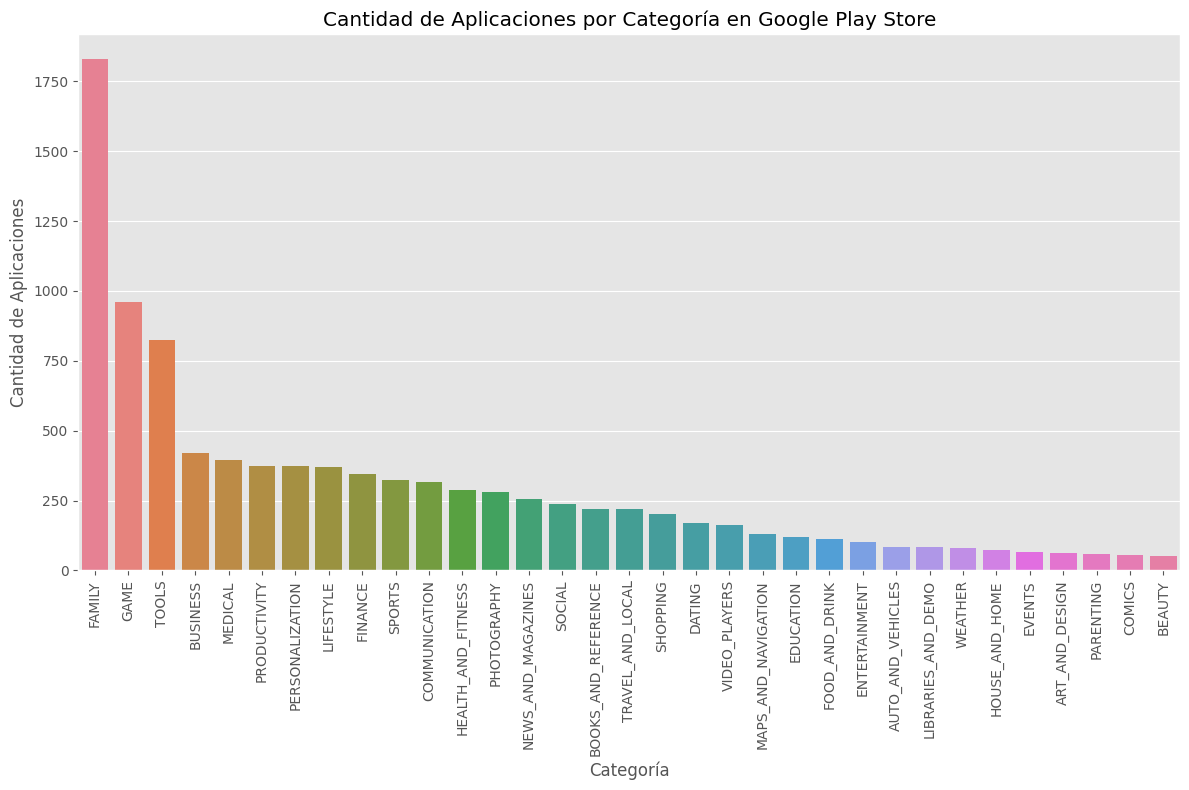

In [135]:


# Crear la figura y el gráfico utilizando Seaborn
plt.figure(figsize=(12, 8))
sns.countplot(x='Category', data=df, palette='husl', order=df['Category'].value_counts().index)
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Aplicaciones')
plt.title('Cantidad de Aplicaciones por Categoría en Google Play Store')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()